In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime



plt.rcParams["figure.figsize"] = (20,10)

In [18]:
data = pd.read_csv('icl_train.csv')

In [4]:
def show_data_by_dates(data,column_name,
                       left = datetime.date(2019, 1, 1),
                       right = datetime.date(2019, 2, 1)):
  group = data[[column_name,'day_date']].groupby(by = ['day_date']).sum()
  x = group.index
  y = group[column_name]
  fig, ax = plt.subplots()
  ax.plot_date(x, y,'b-')
  fig.autofmt_xdate()
  ax.set_xlim([left, right])

In [5]:
def plot_timeseries(df, station, start_date, end_date):
    fig, ax = plt.subplots(figsize=(20,8))
    st_df = df[df.zone == station][['date', 'total']]
    st_df = st_df.loc[(st_df.date >= pd.to_datetime(start_date)) & (st_df.date <= pd.to_datetime(end_date))]
    ax.plot(st_df.date, st_df.total, '.--')
    ax.set_title(station)
    plt.show();

In [19]:
#change data
data['total'] = data.iloc[:, 2:].sum(axis=1)
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].apply(lambda x: x.day)
data['hour'] = data['date'].apply(lambda x: x.hour)
data['day_date'] = data['date'].apply(lambda x: x.date())
data['day_date'] = pd.to_datetime(data['day_date'])
data['day_name'] = data['date'].apply(lambda x: x.day_name())
data['day_year'] = data['date'].apply(lambda x: x.dayofyear)                                  


In [7]:
stations = data['zone'].unique()

d:\downloads\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
d:\downloads\python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
d:\downloads\python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


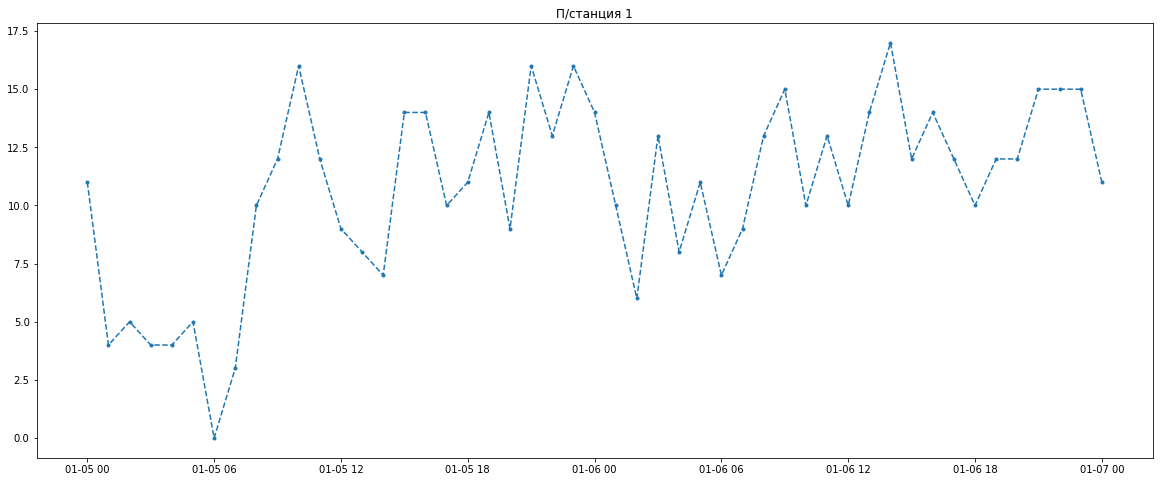

In [11]:
plot_timeseries(data, stations[0], '20190105', '20190107')

In [50]:
column_name = 'Вызов специальной бригады'
station = stations[0]
train_df = data[['date','day_year','day','hour','zone','day_name',column_name]].query('zone == @station')

In [49]:
def add_lag(df,column_name,lag_length):
  for lag in range(1,lag_length+1):
    df[column_name+'_'+str(lag)] = df[column_name].shift(lag)
  return df

#amount - количество дней/часов в году..
def encode_time(df, column_name, amount):
  df[column_name+'_s'] = df[column_name].apply(lambda x: np.sin((2*np.pi)/amount*x))
  df[column_name+'_c'] = df[column_name].apply(lambda x: np.cos((2*np.pi)/amount*x))
  return df

def moving_average(df, column_name, moving_length):
  df[column_name+'_ma_'+str(moving_length)] = df[column_name].rolling(window=moving_length).mean().shift(1)
  return df

def gaussian_average(df, column_name, moving_length):
  df[column_name+'_ga_'+str(moving_length)] = df[column_name].rolling(window=5, win_type='gaussian').mean(std=0.5).shift(1)
  return df



In [ ]:
encode_time(train_df,'hour',24)

In [ ]:
add_lag(train_df,column_name,5)